# Neural Network (NN) for Classification
In this document I will contruct multiple NN models for classification problem, one problem I will be solving is digit recognition from the mnist dataset.

## mnist

In [1]:
# Setup Keras and import the dataset
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils

# Generic Imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Model Hyper Parameters
batch_size = 64
nb_epoch = 10

In [3]:
# Prepare the mnist data as they need to be equally formatted
im_dim = 784 # the total pixel number
nb_classes = 10 #class number

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


The mnist data is in the format of an array of 28 by 28 values, these values represent how light a pixel is from the value 0 (black) to 255 (white)

Label for Image: 0


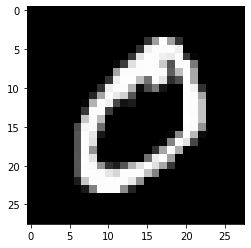

In [5]:
print("Label for Image: " + str(y_train[1]))
plt.imshow(X_train[1], cmap='gray')
plt.show()

To get data in the correct shape for the network to operate on it I will turn the 28 by 28 grid into one long array of values of length 784 (28*28).

In [6]:
X_train = X_train.reshape(60000, im_dim)
X_test = X_test.reshape(10000, im_dim)
# Change Type and Scale down to values between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255
# Change to data type to categorical and set the number of classes to the number of digits
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)
# Sanity check shape
X_train.shape

(60000, 784)

**Build the network**

In [7]:
# Logistic regression model
model = Sequential()
model.add(Dense(input_shape=(im_dim,), activation='relu', units=nb_classes))
model.add(Dense(input_shape=(im_dim,), activation='softmax', units=nb_classes))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**Train Network**

History Object allows us to look at stats of how the model is trained to try optimise the network for the problem

In [8]:
history = model.fit(X_train, Y_Train, epochs=nb_epoch, 
                    validation_split = 0.2,
                    batch_size=batch_size, verbose=0)

**Accuracy While Training**

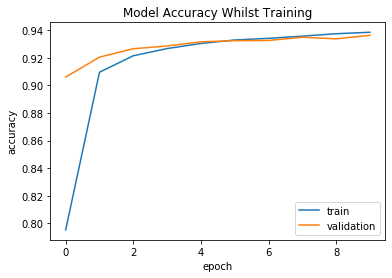

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Whilst Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

**Evaluate Model**

In [10]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))


313/313 [==============================] - 0s 634us/step - loss: 0.2295 - accuracy: 0.9342
Summary: Loss over the test dataset: 0.23, Accuracy: 0.93


## Titanic Subset

**Setting up Dataset**

In [11]:
# Importing Data
raw_titanic_df = pd.read_csv(r'data\partial_titanic.csv')
# Select a subset of features
sub_titanic_df = raw_titanic_df[["Pclass", "Sex", "Age", "Fare", "Survived"]].copy()
# Drop NaN's from Age column which is the only column they exist in
sub_titanic_df = sub_titanic_df[sub_titanic_df["Age"].notna()]

# Split Target and Dependant Variables
X = sub_titanic_df.iloc[:, :-1]
y = sub_titanic_df.iloc[:, -1]

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# 0 & 1 as thats the index of the columns to transform
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scale Train and Test sets by the Scaler that knows the Training Data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(len(X_train[0]))
in_dim = len(X_train[0])

7


**Building Network**

In [12]:
# Logistic regression model
model = Sequential()
model.add(Dense(input_shape=(in_dim,), activation='relu', units=7))
model.add(Dense(activation='relu', units=5))
model.add(Dense(activation='relu', units=3))
model.add(Dense(activation='relu', units=2))
model.add(Dense(activation='sigmoid', units=1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=500, 
                    validation_split = 0.2,
                    batch_size=32, verbose=0)

**Accuracy While Training**


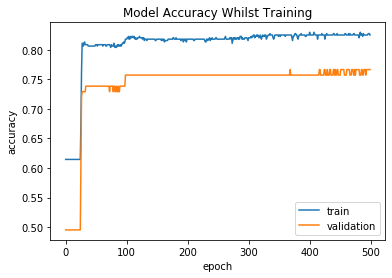

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Whilst Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

In [15]:
# Evaluate
evaluation = model.evaluate(X_test, y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))


6/6 [==============================] - 0s 795us/step - loss: 0.4402 - accuracy: 0.7821
Summary: Loss over the test dataset: 0.44, Accuracy: 0.78


On multiple runs NN acheives an accuracy of ~0.8, which is in line with other models built on this same subset of the Titanic dataset. This model is a little overfitted on the training data as the validation score consistently scores ~0.05 points below the Training Data.